In [122]:
using CSV, DataFrames, StatsBase, Graphs, SparseArrays, Distances, GraphPlot, Plots, SimpleWeightedGraphs, Cairo, Compose, MetaGraphs, OrderedCollections, CommunityDetection, GraphIO, LightGraphs

In [31]:
const N = 2000

2000

In [2]:
if !isfile("coremof.csv")
	download("https://zenodo.org/record/3370144/files/2019-07-01-ASR-public_12020.csv?download=1", "coremof.csv")
end

In [32]:
mof = CSV.File("full_CoRE2019_alldata.csv") |> DataFrame
selection = ["MOFname", "Df", "Di", "Dif", "density [g/cm^3]", "total_SA_volumetric", "total_SA_gravimetric", "total_POV_volumetric", "total_POV_gravimetric"]
rename_fields = [:Di,:Df,:Dif,:ρ,:VSA,:GSA,:VPOV,:GPOV]
sel_fields = mof[!,selection]
nmof = map(eachcol(sel_fields[!,2:end])) do col
	(col .- minimum(col))./(maximum(col)  - minimum(col))
end |> arr -> DataFrame(arr, rename_fields)
idx = sample(1:size(nmof)[1], N)
X =nmof[idx,:] |> Matrix{Float64};
Xf = nmof |> Matrix{Float64}
labels = sel_fields[idx,1];

## Distancia entre nodos


In [91]:
dist = CosineDist()
R = pairwise(dist, X, dims=1)
R = map( f -> f > 0.87 ? f : 0, R ) |> sparse
RA = dropzeros(R)


2000×2000 SparseMatrixCSC{Real, Int64} with 2414 stored entries:
⢊⡰⢈⣆⡆⡂⢀⠰⠲⢸⠆⡶⢀⠶⠆⡆⠆⡀⢈⠰⠶⠀⢶⡶⠰⠀⢞⠆⠀⡰⢀⢈⠰⠲⠰⠰⡰⠆⡶⠆
⠢⢴⠠⡦⡆⠆⠠⢰⢒⢰⡆⣖⠠⣖⡆⡆⡆⠄⠠⢐⣖⠀⣲⣶⢰⠆⡲⡂⠀⢴⠰⠤⢐⣒⢐⢐⢴⡂⣶⡂
⠨⠩⠨⠍⠅⠁⠀⠨⠸⠨⠅⠭⠀⡿⡇⠅⡇⠀⠨⠨⠭⠀⠭⢽⠨⠀⡯⠅⠀⠩⠈⠨⠨⠬⠨⠨⠩⠅⠽⠅
⢀⡐⢀⣂⡀⡀⢀⠐⠀⢀⠂⡀⢀⡃⡃⡀⡂⡀⢀⠀⠂⠀⢐⣘⠘⠀⢀⠀⠀⡐⢀⢀⠀⠀⠀⠀⡘⠀⡀⠀
⣘⣂⢘⣐⡒⡂⠀⢀⣀⢘⡀⣂⠀⣂⡂⡀⡂⠀⢘⢀⣀⠀⣘⣓⢐⠀⣘⡀⠀⢂⢐⢘⢀⣀⢀⢐⣒⡀⣀⡀
⢨⡥⢨⢭⡅⡅⠈⠠⠠⢨⠄⠅⠈⠥⠄⠅⠅⠁⢨⠠⠤⠀⢬⡵⠠⠁⢬⠄⠀⠡⢨⢩⠠⠠⠠⠠⡥⠄⠥⠄
⢠⡔⢠⢦⣤⡤⠤⠰⠠⢠⠆⡄⠠⠆⠆⠄⠆⠄⢠⠀⠦⠀⢴⡴⠰⠄⢤⠀⠄⡔⢤⣤⠀⠀⠀⠠⡴⠀⡄⠀
⠨⠥⠨⠭⠍⠍⠉⠨⠈⠨⠄⠅⠈⠅⠅⠁⠅⠁⠨⠀⠌⠁⠩⠽⠨⠁⠨⠀⠁⠡⠩⠩⠀⠀⠁⠈⠭⠀⠥⠀
⠈⠡⠈⠍⠉⠉⠈⠨⠈⠈⠅⠁⠈⠅⠅⠁⠅⠁⠘⠠⠅⠀⠩⠹⠨⠁⠉⠀⠁⠡⠉⠉⠀⠠⠠⠈⠩⠄⠡⠀
⢂⡐⢀⢂⡂⡂⠀⠐⠒⢐⠂⡒⠀⠒⠂⠂⠒⡀⢀⠐⠒⠀⢒⡒⠐⠂⢒⠒⠀⡐⢐⢀⠐⠒⠐⠐⡒⠂⡒⠂
⠘⠃⠘⠙⠃⠃⠈⠀⠀⠘⠀⠃⠈⠃⠆⠁⠁⠁⠘⠀⠀⠀⠘⠳⠀⠁⠚⠀⠀⠁⠘⠙⠀⠀⠀⠀⠁⠀⠁⠀
⢸⡷⢸⣾⣇⣇⣐⢰⢶⢸⢆⡷⢐⡷⣇⡆⣇⡂⢸⠰⢶⡀⣾⣿⢸⣀⢾⠆⡀⡲⣸⣺⠰⠶⡰⢰⣾⠆⣶⠆
⠐⠂⠰⠖⠂⠂⠒⠀⠐⠐⠄⠂⠐⠆⠆⠂⠆⠂⠰⠀⠄⠀⠒⢲⠠⠂⠐⠀⠂⠢⠐⠲⠀⠀⠀⠀⠢⠀⠂⠀
⠺⠕⠸⠪⠏⠏⠀⠐⠒⠸⠂⠗⠀⠓⠂⠂⠃⠀⢸⠐⠚⠀⠺⠗⠐⠀⠺⠂⠀⠑⠨⠹⠐⠒⠐⠘⠔⠂⠖⠂
⢀⡠⢀⣄⡄⡀⢀⠠⠠⢀⠄⡀⢀⠥⠅⡀⠅⡀⢀⠠⠄⠀⢠⡨⠨⡀⢄⠀⠀⡠⢀⢀⠠⠀⠠⠀⡨⠄⡠⠀
⡀⢐⠐⡆⡂⡀⠀⢐⣐⢐⡆⣒⠀⣷⡇⡂⡇⠀⠐⢐⣖⠀⣲⣺⢰⡀⣆⡂⠀⢐⢀⠐⢐⣐⢐⢐⢰⡂⣲⡂
⢰⡂⢰⢰⡂⡆⠀⠀⠀⢰⠀⡂⠀⠀⠀⠀⠀⡀⢰⠀⠀⠀⢰⡆⠀⠀⢰⠀⠀⠂⢐⢰⠀⠀⠀⠀⡂⠀⡀⠀
⢐⡂⢐⢐⡂⡂⠀⠀⢀⢐⠀⡂⠀⡀⡁⠀⡀⠂⢐⠀⠀⠀⢐⣊⠀⠀⣐⠀⠀⠂⢐⢐⠀⠀⠀⠀⡂⠀⡂⠀
⠰⠎⠰⠳⠇⠆⠒⠈⠘⠸⠁⠏⠐⠋⠃⠃⠃⠆⠸⠈⠁⠀⠺⠟⠈⠂⠰⠁⠂⠎⠰⠲⠈⠈⠈⠈⠎⠁⠏⠁
⠸⠏⠸⠻⠗⠇⠀⠈⠀⠸⠁⠇⠀⠉⠁⠃⠁⠂⠸⠈⠁⠀⠸⠟⠈⠀⠸⠁⠀⠊⠸⠺⠀⠈⠈⠈⠏⠁⠏⠁

In [130]:
g = SimpleWeightedGraph(RA)


{2000, 1207} undirected simple Int64 graph with Real weights

In [134]:
file = "grafo.GEXF"
savegraph(file, g)

1

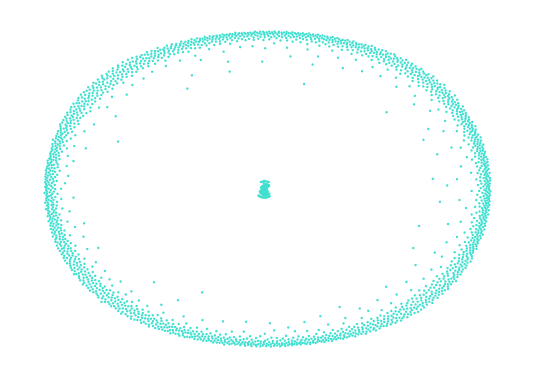

In [93]:
gp = gplot(g, layout = spring_layout)
draw(PNG("mof.png"),gp)
gp

In [36]:
non_null_deg_cen = Dict()
degree_centrality = Dict( labels[vertex] => length(neighbors(g,vertex))/(N-1) for vertex in vertices(g))
for (k,v) in pairs(degree_centrality)
	if v != 0 
		non_null_deg_cen[k] = v
	end
end
non_null_deg_cen

Dict{Any, Any} with 267 entries:
  "MEJMOE_clean"                        => 0.0190095
  "SUJQOE_clean"                        => 0.00050025
  "UMOYOM12_clean"                      => 0.0310155
  "NUZSAD_clean"                        => 0.002001
  "jacs.6b08724_ja6b08724_si_010_clean" => 0.0205103
  "KOJZEP_manual"                       => 0.0265133
  "VIZSOO_clean"                        => 0.006003
  "KEFBOO_clean"                        => 0.0105053
  "ILITUT_manual"                       => 0.026013
  "LEHXUT_clean"                        => 0.0275138
  "GIZVER_clean"                        => 0.00150075
  "LUSZOP_clean"                        => 0.0530265
  "JUJZEV_clean"                        => 0.0115058
  "FUDHAP_clean"                        => 0.00950475
  "ISIYUF03_clean"                      => 0.002001
  "QIYDEJ_clean"                        => 0.024012
  "MAGVOG16_clean"                      => 0.0905453
  "VUSJUP_clean"                        => 0.0255128
  "TAZYAV_clean

In [37]:
non_null_deg = Dict()
degrees = Dict( labels[vertex] => length(neighbors(g,vertex)) for vertex in vertices(g))
for (k,v) in pairs(degrees)
	if v != 0 
		non_null_deg[k] = v
	end
end
degrees = OrderedDict(degrees)

OrderedDict{String, Int64} with 1813 entries:
  "MEJMOE_clean"                 => 38
  "YOYQOU_clean"                 => 0
  "XUCLIS_clean"                 => 0
  "ALIXUP_clean"                 => 0
  "KUZPEC_clean"                 => 0
  "NUTYIM_clean"                 => 0
  "c6cc03026b_c6cc03026b2_clean" => 0
  "LAGHIL_clean"                 => 0
  "DOYHOQ_clean"                 => 0
  "YIVZIO_clean"                 => 0
  "KASPOL_clean"                 => 0
  "RESDUQ_clean"                 => 0
  "NUHRAL_clean"                 => 0
  "OJAZOP_clean"                 => 0
  "VIZSOO_clean"                 => 12
  "ROQNES03_clean"               => 0
  "GAPDUX_clean"                 => 0
  "DUDKIY_clean"                 => 0
  "NUFBUN_clean"                 => 0
  ⋮                              => ⋮

In [38]:
# non_null_deg = Dict()
closeness_centrality = Dict( labels[vertex] => (N-1)/sum(R[vertex,:]) for vertex in vertices(g))
for (k,v) in pairs(degrees)
	if v != 0 
		non_null_deg[k] = v
	end
end
# degrees = OrderedDict(degrees)

In [39]:
data = Dict(
	"label" => [],
	"degree" => [],
	"degree_centrality" => [],
	"closeness_centrality" => []
)
for key in keys(degrees)
	push!(data["label"],key)
	push!(data["degree"], degrees[key])
	push!(data["degree_centrality"], degree_centrality[key])
	push!(data["closeness_centrality"], closeness_centrality[key])
end


In [46]:
sum(Graphs.degree_centrality(g))

7.909954977488743

In [48]:
sum(df."degree_centrality")

6.945472736368179

In [40]:
df = DataFrame(data)
sort(df, "degree", rev=true)

,closeness_centrality,degree,degree_centrality,label
,Any,Any,Any,Any
1,12.1349,193,0.0965483,LIHRIE_clean
2,12.1596,193,0.0965483,NARVUA_clean
3,12.3149,191,0.0955478,MAKHAK_clean
4,12.2856,191,0.0955478,FIGXEY_clean
5,12.3497,190,0.0950475,UKULOB01_clean
6,12.4947,188,0.094047,YAZYEF_clean
7,12.7238,185,0.0925463,RUGGOR_clean
8,13.008,181,0.0905453,MAGVOG16_clean
9,13.0026,181,0.0905453,MAGVOG02_clean


In [61]:
R |> sparse

2000×2000 SparseMatrixCSC{Real, Int64} with 15812 stored entries:
⢾⡳⢾⣿⣿⣿⣟⢸⢾⢸⢶⡷⢞⡷⣷⡇⣷⡳⢞⠶⢾⡱⣿⣿⢾⣗⣾⠶⡳⡷⣿⣿⠲⠶⡱⢾⣿⠶⣷⠶
⣾⣷⣾⣿⣿⣿⣮⢸⣶⢸⣶⣷⣪⣷⣷⡇⣷⣷⣾⣶⣾⢴⣾⣿⣶⣷⣿⣶⣴⣷⣿⣿⢲⣶⢴⣾⣿⣶⣷⣶
⣿⣿⣿⣿⣿⡿⢽⢸⣿⢸⡯⣿⠽⣿⡯⡇⣿⣯⣿⣿⣿⢽⣿⣿⢽⡧⣿⣿⢿⣿⣿⣿⢸⣿⢽⣿⣿⣿⣿⣿
⣛⣙⣊⣛⣓⣓⣊⢘⣛⢘⣓⣛⢀⣛⣗⡃⣓⣙⣋⣚⣛⣘⣛⣻⢚⣃⣟⣛⣘⣛⣛⣛⢘⣛⣘⣚⣛⣛⣛⣓
⣚⣓⣘⣛⣛⣛⣛⢘⣚⢘⣒⣓⣘⣓⣃⡃⣓⣓⣚⣒⣚⣓⣛⣛⣘⣓⣚⣒⣓⣓⣛⣛⣐⣒⣓⣚⣛⣒⣓⣒
⢼⡷⢼⣿⣯⣯⣽⢸⢼⢸⢮⡷⢬⡷⡯⡇⡯⡧⢼⠴⢮⡥⣽⣿⢼⣯⢿⠦⡥⡷⣽⣿⠠⠶⡵⢼⣿⠦⣿⠦
⢾⡵⢮⣾⣷⣧⣤⢰⢶⢸⢦⡷⢠⡶⡶⡆⡶⡵⢮⠶⢶⡴⣾⣿⢶⡦⢾⠶⡴⡴⣾⣮⠴⠶⡴⢶⣷⠶⣷⠶
⠽⠿⠽⠿⠯⠯⠽⠹⠭⠸⠯⠯⠸⠯⠯⠇⠯⠧⠼⠽⠯⠥⠽⢿⠼⠯⠿⠭⠥⠿⠽⠿⠩⠭⠽⠬⠿⠥⠿⠥
⢽⡻⢽⣿⡿⣿⣝⢸⢽⢸⠯⡯⢜⡯⠯⡇⡯⡫⢝⠭⠿⠫⣿⣿⠽⡏⢽⠭⡫⡿⣿⣿⠨⠭⠫⢽⣿⠭⡯⠭
⢺⡕⢺⣿⣿⣿⣫⢸⢺⢸⢒⡗⢪⡗⣖⡇⡗⡕⢪⠒⢺⡐⣿⣿⢒⣗⢾⠒⡕⡗⣿⣿⠒⠒⡐⢺⣿⠒⣗⠒
⢞⡳⢚⣟⣟⣟⣛⢸⢾⢸⠎⡷⢘⡷⠏⡇⡿⡃⢚⠲⢾⠓⣿⣿⠸⡏⢾⠶⡓⡳⣻⣛⠰⠶⠳⢸⣿⠖⡿⠖
⣿⣿⣾⣿⣿⣿⣿⣸⣿⢸⣷⣿⣾⣿⣷⣇⣿⣿⣿⣿⣿⣿⣿⣿⢾⣷⣿⣿⣿⣿⣿⣿⣸⣿⣿⢿⣿⣿⣿⣿
⢾⢷⢼⣿⠷⡷⠾⢰⢶⢸⡶⣷⠸⡷⡶⡇⡷⠧⢼⢴⡶⠦⢾⣷⢴⠗⣾⡦⠶⢷⢾⢿⠰⣶⢶⢴⢷⡶⣷⡦
⢺⡟⢻⣿⣿⣿⣿⢹⢺⢸⠻⡗⢺⡗⡟⡇⡗⡗⢺⠓⢺⡗⣿⣿⠺⡿⢻⠒⡗⡗⣿⣿⠒⠒⠗⢺⣿⠒⡿⠒
⢽⡮⢴⣿⣿⣷⣶⢸⢽⢸⢥⡯⢐⡯⣥⡇⣯⡮⢵⠭⢽⡨⣿⣿⢼⣇⢽⠭⡪⡮⣿⣷⠨⠭⡨⢽⣿⠭⣯⠭
⣿⣿⣿⣿⣿⣿⣿⢸⣿⢸⣷⣿⡺⣿⣷⡇⣿⣿⣿⣿⣿⢺⣿⣿⣾⣗⣿⣿⢿⣿⣿⣿⣸⣿⢺⣿⣿⣿⣿⣿
⢸⡆⢸⣶⣶⣶⣶⢰⢰⢸⢠⡆⢰⡇⡇⡆⡆⡆⢸⠀⢰⡆⣶⣾⢰⣦⢸⠀⡆⡆⣶⣾⠀⠀⡆⢰⣶⠀⣶⠀
⣱⣎⣰⣷⣷⣷⣲⢸⣹⢸⣑⣏⢰⣏⡓⡇⣏⣆⣰⣈⣙⣂⣿⣟⢘⣗⣹⣁⣆⣎⣾⣶⢈⣉⣊⣸⣾⣁⣟⣁
⢻⡟⢻⣿⣿⣿⣿⢸⢻⢸⠻⡟⢹⡟⠟⡇⡟⡟⢻⠛⢻⠟⣿⣿⢹⡷⢻⠛⡟⡟⣿⣿⠘⠛⠞⢻⣿⠛⡿⠛
⢹⡟⢹⣿⣿⣿⢿⢸⢹⢸⠻⡟⢹⡟⠟⡇⡏⡏⢹⠙⢻⠏⣿⣿⠹⡿⢻⠋⡏⡟⣿⣿⠘⠛⠟⢹⣿⠋⡿⠋

In [54]:
clique_percolation(g, 15)

MethodError: MethodError: no method matching clique_percolation(::SimpleWeightedGraph{Int64, Real}, ::Int64)
Closest candidates are:
  clique_percolation(!Matched::Type{SimpleTraits.Not{IsDirected{var"##415"}}}, ::var"##415"; k) where var"##415" at ~/.julia/packages/Graphs/pxGmw/src/community/clique_percolation.jl:30
  clique_percolation(::var"##415"; kwargs...) where var"##415" at ~/.julia/packages/SimpleTraits/l1ZsK/src/SimpleTraits.jl:338